# Solve a Linear System with LU decomposition

In [1]:
import time
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("Ready.")

Ready.


### Compute the speedups of using LUD in solving a Linear System

In [4]:
ds = np.linspace(10,10000,10).astype(np.int)

In [5]:
speedups_inv,speedups_solve = [],[]
for d_idx,d in enumerate(ds):
    print ("[%d/%d] d:[%d]"%(d_idx,len(ds),d))
    n_trial = 5
    As = [np.random.randn(d,d)]*n_trial 
    bs = [np.random.randn(d) for _ in range(n_trial)] 
    # 1. Use np.linalg.inv
    xs_inv = []
    t_start = time.time()
    for A,b in zip(As,bs):
        A_inv = np.linalg.inv(A)
        x = np.matmul(A_inv,b)
        xs_inv.append(x)
    esec_inv = time.time() - t_start
    print (" np.linalg.inv+np.matmul took [%.3e]"%(esec_inv))
    
    # 2. Use np.linalg.solve
    xs_solve = []
    t_start = time.time()
    for A,b in zip(As,bs):
        x_solve = np.linalg.solve(A,b)
        xs_solve.append(x_solve)
    esec_solve = time.time() - t_start
    print (" np.linalg.solve took [%.3e]"%(esec_solve))
    
    # 3. Use la.lu_factor
    t_start = time.time()
    for A in As:
        lu, piv = la.lu_factor(A)
    esec_lu = time.time() - t_start
    print (" la.lu_factor took [%.3e]"%(esec_lu))
    
    # 4. Use la.lu_solve
    t_start = time.time()
    # err_sum = 0
    for b_idx,b in enumerate(bs):
        x_lu_solve = la.lu_solve((lu, piv), b)
        # err = np.linalg.norm(xs_solve[b_idx]-x_lu_solve)
        # err_sum += err
    # err_avg = err_sum / len(bs)
    esec_lusolve = time.time() - t_start
    speedup_inv,speedup_solve = esec_inv/esec_lusolve,esec_solve/esec_lusolve
    print (" la.lu_solve took [%.3e]. It is [%.1f] faster than solve and [%.1f] faster than inv."%
           (esec_lusolve,speedup_solve,speedup_inv))
    speedups_inv.append(speedup_inv)
    speedups_solve.append(speedup_solve)
print ("Done.")

np.linalg.inv+np.matmul took [3.703e-04]
np.linalg.solve took [1.090e-04]
la.lu_factor took [8.960e-04]
la.lu_solve took [3.560e-04]. It is [0.3] faster than solve and [1.0] faster than inv.
np.linalg.inv+np.matmul took [1.950e-01]
np.linalg.solve took [9.241e-02]
la.lu_factor took [5.564e-02]
la.lu_solve took [3.946e-03]. It is [23.4] faster than solve and [49.4] faster than inv.
np.linalg.inv+np.matmul took [1.126e+00]
np.linalg.solve took [4.285e-01]
la.lu_factor took [4.534e-01]
la.lu_solve took [2.732e-02]. It is [15.7] faster than solve and [41.2] faster than inv.
np.linalg.inv+np.matmul took [3.374e+00]
np.linalg.solve took [1.210e+00]
la.lu_factor took [1.764e+00]
la.lu_solve took [6.048e-02]. It is [20.0] faster than solve and [55.8] faster than inv.
np.linalg.inv+np.matmul took [8.258e+00]
np.linalg.solve took [2.731e+00]
la.lu_factor took [3.314e+00]
la.lu_solve took [1.132e-01]. It is [24.1] faster than solve and [73.0] faster than inv.
np.linalg.inv+np.matmul took [1.326e+

### Plot number of equation vs. speedups

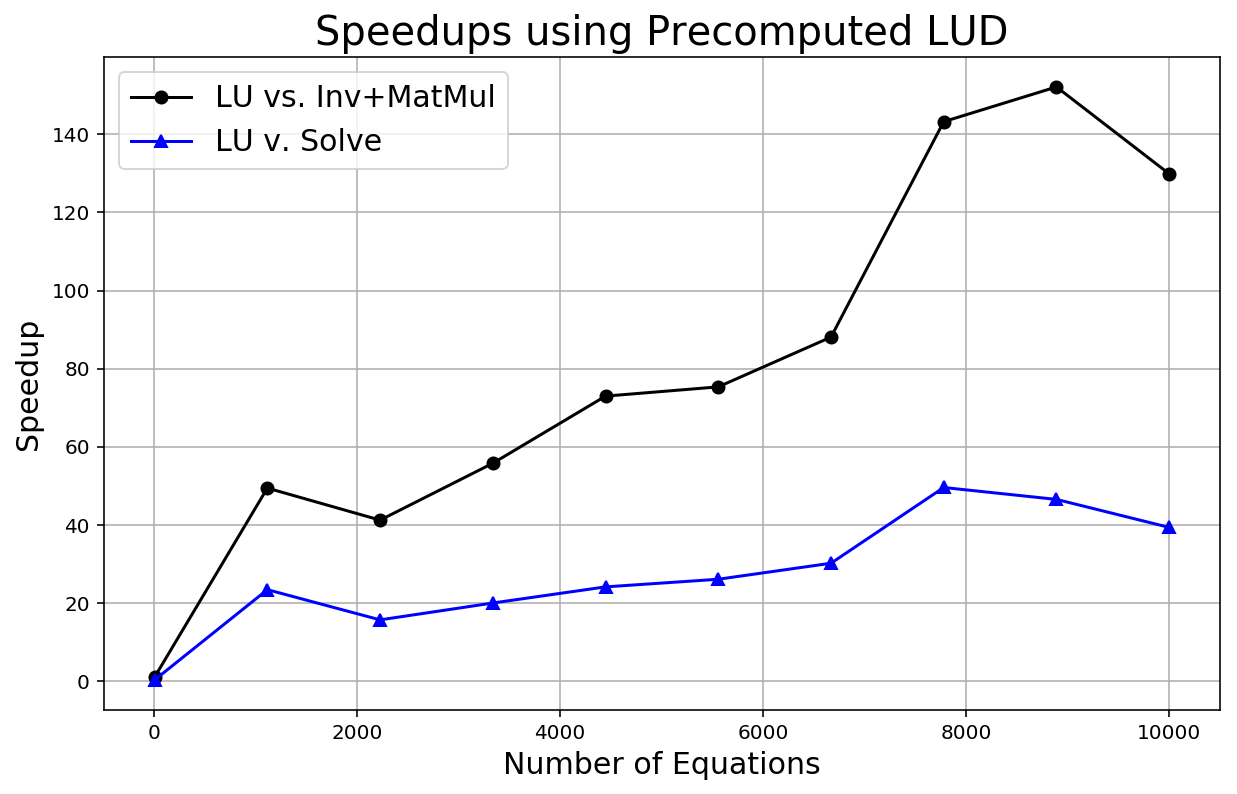

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ds,np.asarray(speedups_inv),'ko-',label='LU vs. Inv+MatMul')
plt.plot(ds,np.asarray(speedups_solve),'b^-',label='LU v. Solve')
plt.xlabel("Number of Equations",fontsize=15)
plt.ylabel("Speedup",fontsize=15)
plt.grid(True, which="both", ls="-")
plt.legend(fontsize=15)
plt.title("Speedups using Precomputed LUD",fontsize=20)
plt.show()